<a href="https://colab.research.google.com/github/escorpio11/programa-python/blob/main/UNI/VISUALIZACION_DE_DATOS/M%C3%93DULO_2_Matplotlib_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

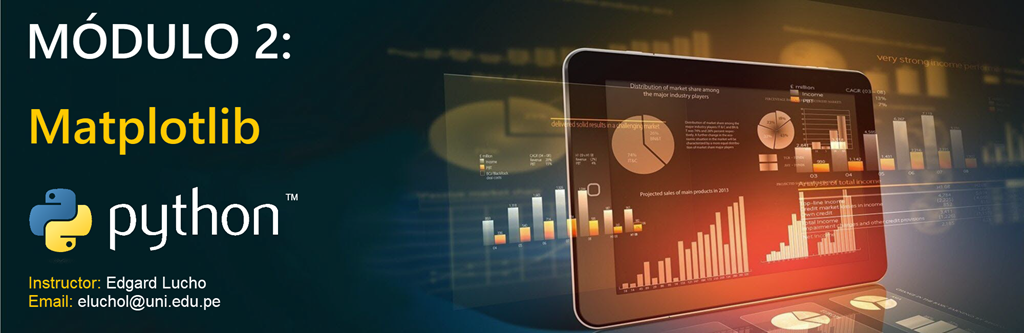

<table width='99%'>
<tr>
<td bgcolor='#306998'>

# **<font color="#FFFFFF">Módulo 2: Matplotlib</font>**

</td>
</tr>
</table>

**Matplotlib** es una biblioteca de visualización de datos en Python que permite crear gráficos y visualizaciones de alta calidad de manera sencilla.

Es una de las bibliotecas más utilizadas en el ecosistema de Python para el análisis de datos y la ciencia de datos.

<table width='99%'>
<tr>
<td bgcolor='#FFD43B'>

## **<font color="#000000">Características</font>**

</td>
</tr>
</table>

>* **Gráficos Versátiles**: Matplotlib permite crear una amplia variedad de gráficos, incluyendo gráficos de líneas, dispersión, barras, histogramas, gráficos de pastel, gráficos de superficie y más.
>* **Personalización**: Ofrece múltiples opciones para personalizar los gráficos, como títulos, etiquetas, leyendas, colores y estilos de línea, lo que permite a los usuarios adaptar las visualizaciones a sus necesidades específicas.
>* **Integración**: Matplotlib se integra bien con otras bibliotecas de Python, como NumPy y pandas, lo que facilita la visualización de datos representados en arreglos y DataFrames.
>* **Interactividad**: Algunas funciones de Matplotlib permiten crear gráficos interactivos, donde los usuarios pueden hacer zoom, mover y explorar los datos de manera más efectiva.
>* **Exportación**: Permite guardar gráficos en varios formatos (como PNG, PDF, SVG, etc.) para su uso en informes o como imágenes estáticas.
>* **Soporte para Gráficos 3D**: También incluye módulos que permiten la creación de gráficos en 3D.

<table width='99%'>
<tr>
<td bgcolor='#FFD43B'>

## **<font color="#000000">Carga de los datos</font>**

</td>
</tr>
</table>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df_DimCurrency = pd.read_excel('drive/MyDrive/db/empresa.xlsx', sheet_name='DimCurrency')
df_DimPromotion = pd.read_excel('drive/MyDrive/db/empresa.xlsx', sheet_name='DimPromotion')
df_DimEmployee = pd.read_excel('drive/MyDrive/db/empresa.xlsx', sheet_name='DimEmployee')
df_DimGeography = pd.read_excel('drive/MyDrive/db/empresa.xlsx', sheet_name='DimGeography')
df_DimProduct = pd.read_excel('drive/MyDrive/db/empresa.xlsx', sheet_name='DimProduct')
df_DimProductCategory = pd.read_excel('drive/MyDrive/db/empresa.xlsx', sheet_name='DimProductCategory')
df_DimProductSubcategory = pd.read_excel('drive/MyDrive/db/empresa.xlsx', sheet_name='DimProductSubcategory')
df_DimSalesTerritory = pd.read_excel('drive/MyDrive/db/empresa.xlsx', sheet_name='DimSalesTerritory')
df_FactResellerSales = pd.read_excel('drive/MyDrive/db/empresa.xlsx', sheet_name='FactResellerSales')

In [ ]:
df_FactResellerSales['OrderDate']

,OrderDate
0,2010-12-29
1,2010-12-29
2,2010-12-29
3,2010-12-29
4,2010-12-29
...,...
60850,2013-11-29
60851,2013-11-29
60852,2013-11-29
60853,2013-11-29


In [ ]:
import numpy as np
import pandas as pd

fecha_min = df_FactResellerSales['OrderDate'].min()
fecha_max = df_FactResellerSales['OrderDate'].max()

fechas = pd.date_range(fecha_min, fecha_max, freq='D')

df_DimCalendario = pd.DataFrame({'Fecha': fechas})

df_DimCalendario['Año'] = df_DimCalendario['Fecha'].dt.year
df_DimCalendario['Semestre'] = np.where(df_DimCalendario['Fecha'].dt.month <= 6, 'S-1', 'S-2')
df_DimCalendario['Trimestre'] = ((df_DimCalendario['Fecha'].dt.month -1) // 3 + 1).apply(lambda x: f'T-{x}')
df_DimCalendario['Mes'] = df_DimCalendario['Fecha'].dt.month_name()
df_DimCalendario['MesAbr'] = df_DimCalendario['Fecha'].dt.month_name().str[:3]
df_DimCalendario['MesNum'] = df_DimCalendario['Fecha'].dt.month
df_DimCalendario['SemAño'] = df_DimCalendario['Fecha'].dt.isocalendar().week
df_DimCalendario['Dia'] = df_DimCalendario['Fecha'].dt.day_name()
df_DimCalendario['DiaAbr'] = df_DimCalendario['Fecha'].dt.day_name().str[:3]
df_DimCalendario['DiaNumSem'] = df_DimCalendario['Fecha'].dt.dayofweek + 1
df_DimCalendario['DiaMes'] = df_DimCalendario['Fecha'].dt.day

In [ ]:
df_categoria_subcategoria = pd.merge(df_DimProductCategory, df_DimProductSubcategory, on='ProductCategoryKey', how='inner').copy()
df_categoria_subcategoria_producto = pd.merge(df_categoria_subcategoria, df_DimProduct, on='ProductSubcategoryKey', how='inner').copy()
df_categoria_subcategoria_producto = df_categoria_subcategoria_producto.rename(columns={'StartDate': 'FechaIniPrd', 'EndDate': 'FechaFinPrd'}).copy()

df_DimPromotion['MaxQty'] = df_DimPromotion['MaxQty'].fillna(99999)

df_FactVentas = pd.merge(df_FactResellerSales, df_DimPromotion, on='PromotionKey', how='inner').copy()
df_FactVentas = pd.merge(df_FactVentas, df_categoria_subcategoria_producto, on='ProductKey', how='inner').copy()
df_FactVentas = pd.merge(df_FactVentas, df_DimCalendario, left_on='OrderDate', right_on='Fecha', how='inner').copy()

In [ ]:
df_FactVentas['Costos'] = df_FactVentas['OrderQuantity'] * df_FactVentas['ProductStandardCost']
df_FactVentas['Ventas'] = df_FactVentas['OrderQuantity'] * df_FactVentas['UnitPrice'] * (
    1
    -
    np.where
    (
        (df_FactVentas['OrderDate'] >= df_FactVentas['StartDate']) &
        (df_FactVentas['OrderDate'] <= df_FactVentas['EndDate']) &
        (df_FactVentas['OrderQuantity'] >= df_FactVentas['MinQty']) &
        (df_FactVentas['OrderQuantity'] <= df_FactVentas['MaxQty']),
        df_FactVentas['DiscountPct'],
        df_FactVentas['UnitPriceDiscountPct']
    )
    )
df_FactVentas['Utilidad'] = df_FactVentas['Ventas'] - df_FactVentas['Costos']
df_FactVentas['PorcentajeMargen'] = (df_FactVentas['Utilidad'] / df_FactVentas['Ventas']) * 100

In [ ]:
df_ventas_x_año = df_FactVentas.groupby('Año')['Ventas'].sum().reset_index()
df_ventas_x_año.head(50)

,Año,Ventas
0,2010,4.893286e+05
1,2011,1.819280e+07
2,2012,2.819363e+07
3,2013,3.357483e+07


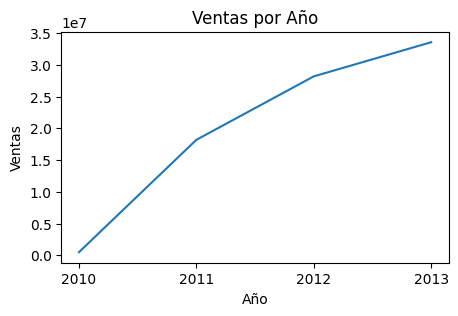

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'])
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> Configuración de estilo de gráficos</font>**
</td>
</tr>
</table>

| Estilo             | Descripción                                         |
|--------------------|-----------------------------------------------------|
| **'default'**      | Estilo básico de Matplotlib.                        |
| **'ggplot'**       | Basado en el estilo de gráficos de ggplot2 (R).   |
| **'bmh'**          | Estilo que combina un fondo claro con líneas y puntos oscuros. |
| **'classic'**      | Estilo clásico de Matplotlib (anterior a la versión 2.0). |
| **'fast'**         | Estilo optimizado para velocidad, con menos detalles visuales. |
| **'fivethirtyeight'**| Estilo inspirado en los gráficos de FiveThirtyEight. |
| **'dark_background'**| Estilo con fondo oscuro y colores brillantes.    |
| **'Solarize_Light2'**| Estilo que utiliza la paleta Solarized.          |

<table width='99%'>
<tr>
<td bgcolor='#306998'>

### **<font color="#FFFFFF">ggplot</font>**

</td>
</tr>
</table>

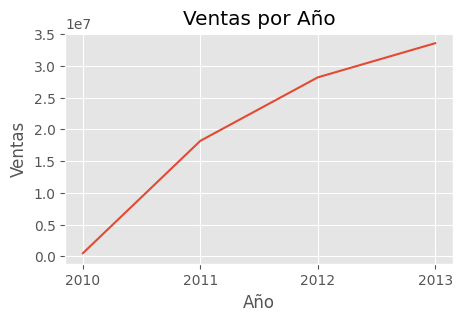

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default') # Restablecer el estilo a la configuración predeterminada.
plt.style.use('ggplot')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'])
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#306998'>

### **<font color="#FFFFFF">bmh</font>**

</td>
</tr>
</table>

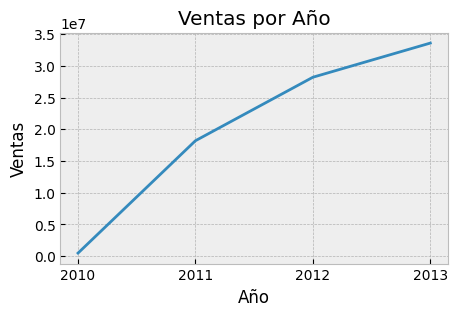

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.style.use('bmh')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'])
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#306998'>

### **<font color="#FFFFFF">classic</font>**

</td>
</tr>
</table>

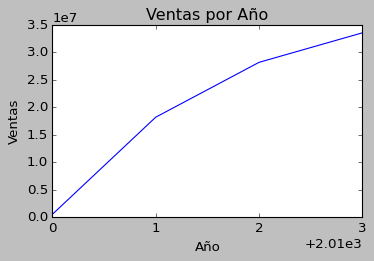

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.style.use('classic')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'])
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#306998'>

### **<font color="#FFFFFF">fast</font>**

</td>
</tr>
</table>

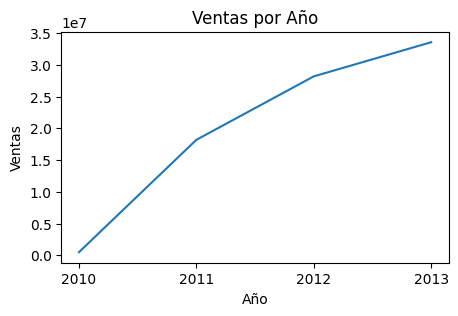

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.style.use('fast')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'])
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#306998'>

### **<font color="#FFFFFF">fivethirtyeight</font>**

</td>
</tr>
</table>

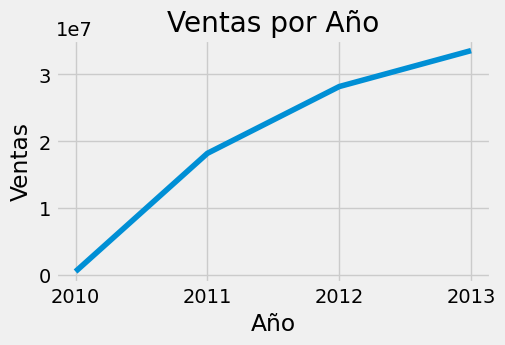

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'])
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#306998'>

### **<font color="#FFFFFF">dark_background</font>**

</td>
</tr>
</table>

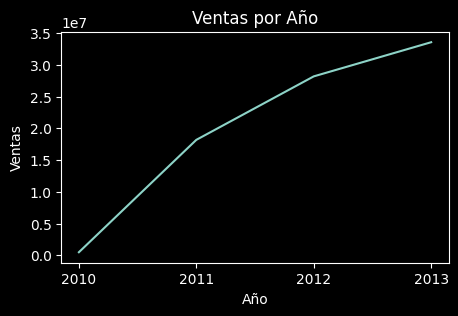

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.style.use('dark_background')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'])
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#306998'>

### **<font color="#FFFFFF">Solarize_Light2</font>**

</td>
</tr>
</table>

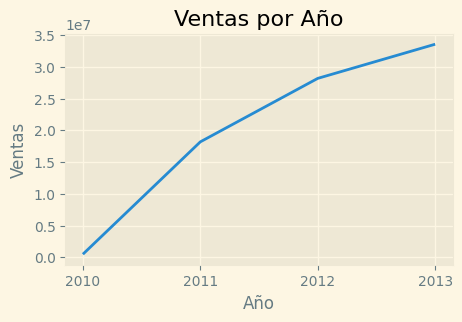

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.style.use('Solarize_Light2')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'])
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> Personalización de los colores de las líneas</font>**
</td>
</tr>
</table>

| Color      | Descripción                           |
|------------|---------------------------------------|
| **'red'**      | Color intenso asociado con la pasión. |
| **'green'**    | Color de la naturaleza y el crecimiento. |
| **'blue'**     | Color calmante, relacionado con el cielo y el agua. |
| **'yellow'**   | Color brillante que evoca alegría y energía. |
| **'purple'**   | Color asociado con la realeza y la creatividad. |
| **'orange'**   | Color vibrante que representa entusiasmo y calidez. |
| **'black'**    | Color que simboliza elegancia y sofisticación. |
| **'white'**    | Color de la pureza y la simplicidad. |
| **'gray'**     | Color neutral que representa equilibrio. |
| **'pink'**     | Color suave que a menudo se asocia con el amor y la ternura. |

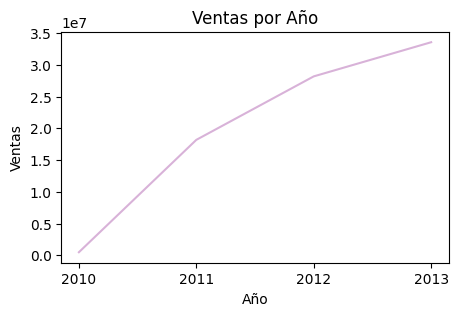

In [ ]:
import matplotlib.pyplot as plt
# alpha=0.3: Transparencia: 0..1
plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', alpha=0.3)
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

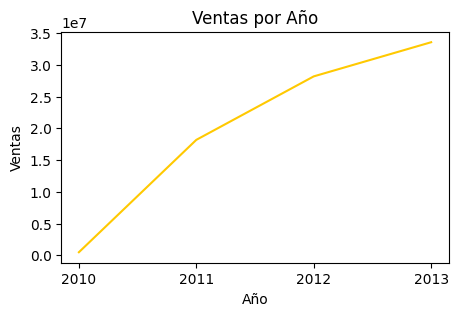

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='#ffc901')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

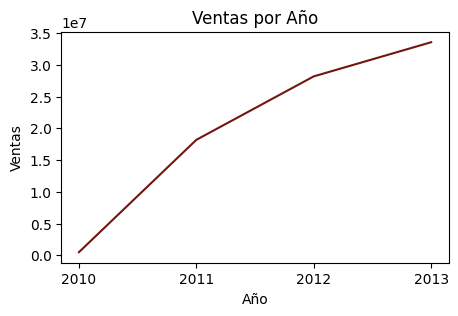

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='#711610')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

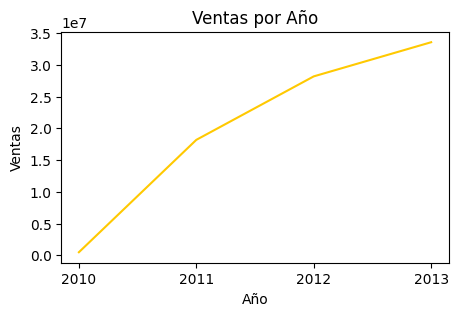

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color=(255/255, 201/255, 1/255))
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

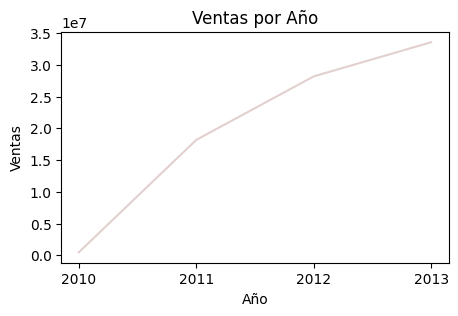

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color=(113/255, 22/255, 16/255, 20/100))
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> Personalización de los tipos de líneas</font>**
</td>
</tr>
</table>

| Tipo de línea | Descripción                                     |
|---------------|-------------------------------------------------|
| **'-'**       | Línea sólida                                   |
| **'--'**      | Línea discontinua (dashed)                     |
| **'-.'**      | Línea de puntos y rayas (dash-dot)             |
| **':'**       | Línea punteada (dotted)                        |
| **'None'**    | Sin línea (sólo marcadores)                    |
| **'solid'**   | Sinónimo de línea sólida                        |
| **'dashed'**  | Sinónimo de línea discontinua                   |
| **'dotted'**  | Sinónimo de línea punteada                      |
| **'dashdot'** | Sinónimo de línea de puntos y rayas            |

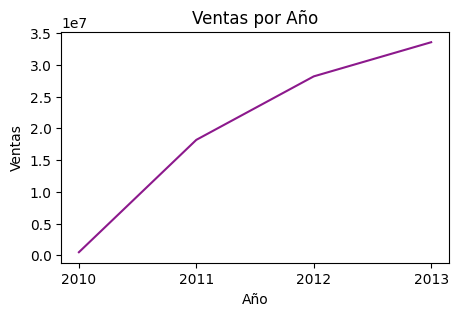

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', alpha=0.9, linestyle='-')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

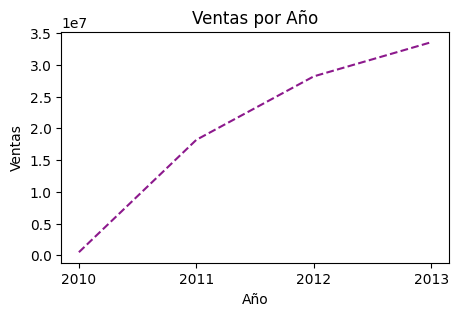

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', alpha=0.9, linestyle='--')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

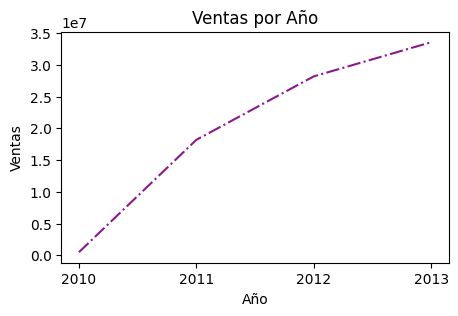

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', alpha=0.9, linestyle='-.')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

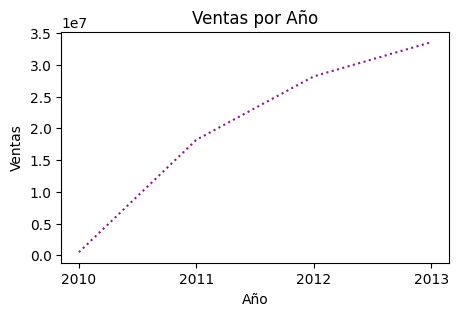

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', alpha=0.9, linestyle=':')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

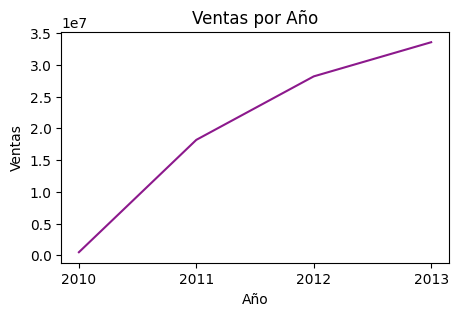

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', alpha=0.9, linestyle='solid')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

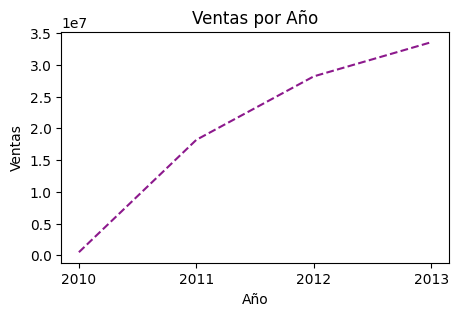

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', alpha=0.9, linestyle='dashed')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

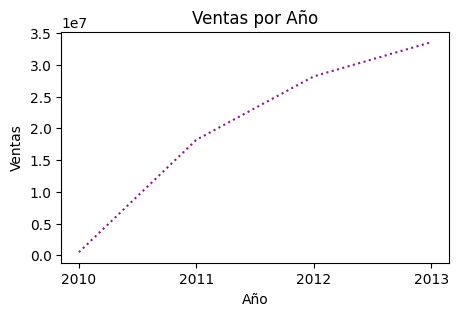

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', alpha=0.9, linestyle='dotted')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

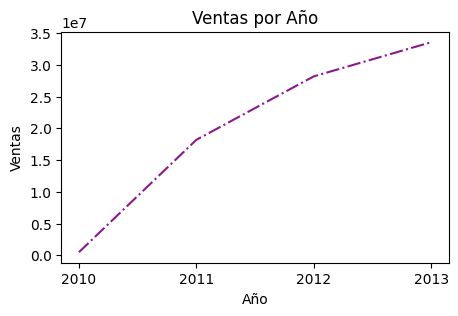

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', alpha=0.9, linestyle='dashdot')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#306998'>

### **<font color="#FFFFFF">Ancho de la línea</font>**

</td>
</tr>
</table>

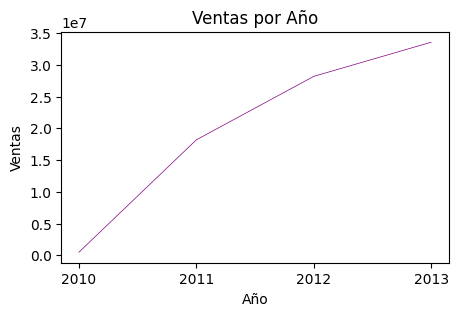

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', linewidth=0.5)
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

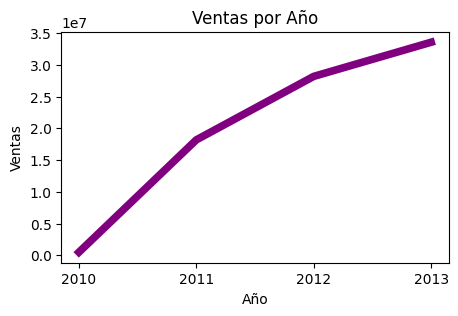

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', linewidth=5.5)
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> Personalización de los marcadores de las líneas</font>**
</td>
</tr>
</table>

| Símbolo | Descripción                       |
|---------|-----------------------------------|
| `o`     | Marcador circular                 |
| `s`     | Marcador cuadrado                 |
| `^`     | Marcador en forma de triángulo (apuntando hacia arriba) |
| `v`     | Marcador en forma de triángulo (apuntando hacia abajo) |
| `>`     | Marcador en forma de triángulo (apuntando hacia la derecha) |
| `<`     | Marcador en forma de triángulo (apuntando hacia la izquierda) |
| `d`     | Marcador en forma de rombo       |
| `*`     | Marcador en forma de estrella     |
| `.`     | Pequeño punto                     |
| `+`     | Marcador en forma de más          |
| `x`     | Marcador en forma de cruz         |
| `|`     | Línea vertical como marcador       |
| `_`     | Línea horizontal como marcador     |

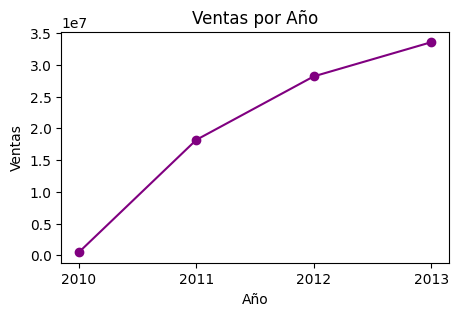

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', marker='o')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

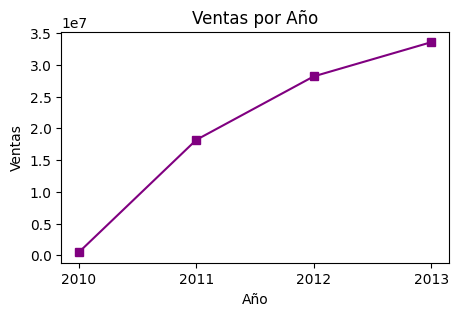

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', marker='s')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

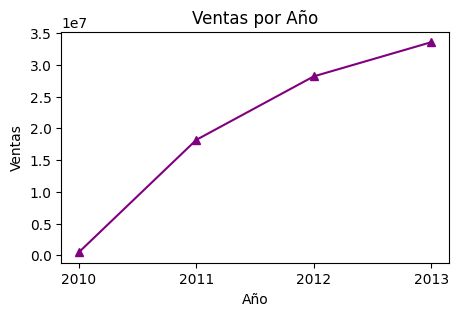

In [ ]:
plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', marker='^')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

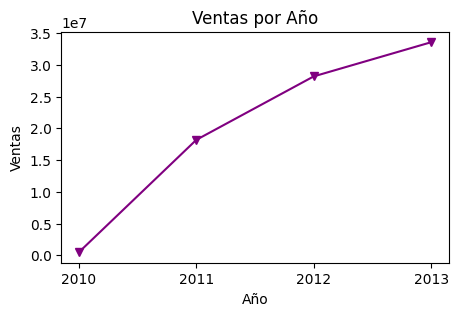

In [ ]:
plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', marker='v')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

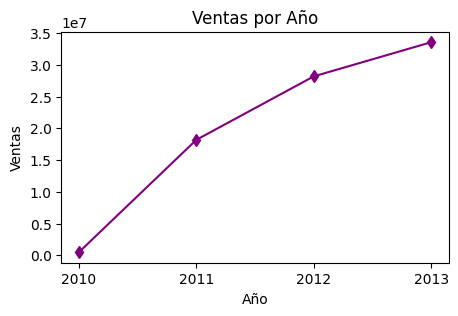

In [ ]:
plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', marker='d')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

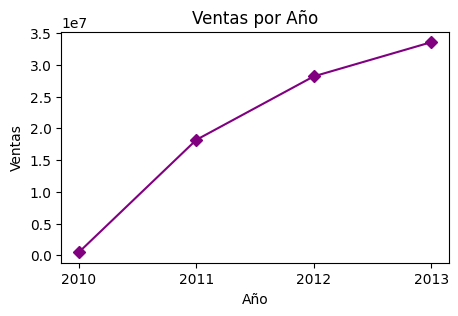

In [ ]:
plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', marker='D')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

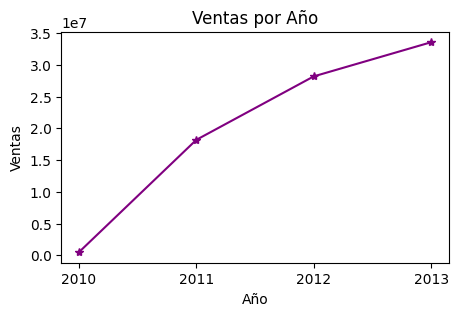

In [ ]:
plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', marker='*')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

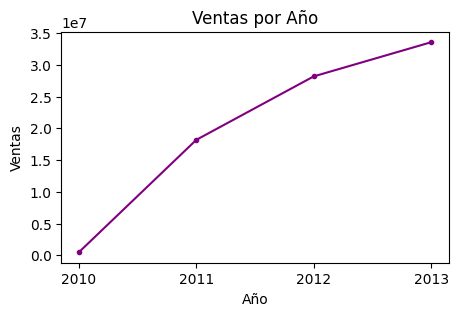

In [ ]:
plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', marker='.')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

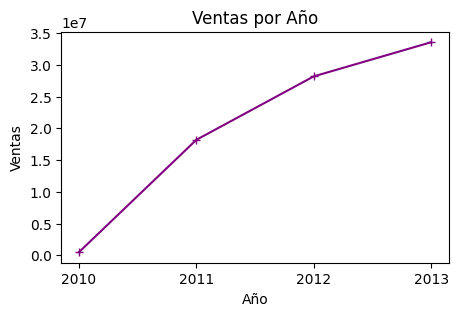

In [ ]:
plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', marker='+')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

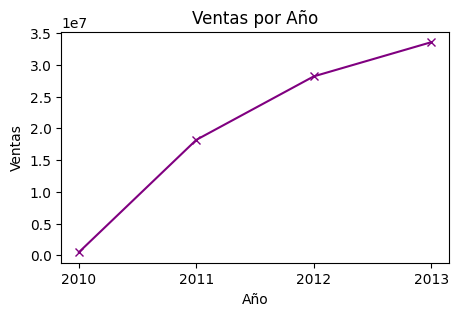

In [ ]:
plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', marker='x')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

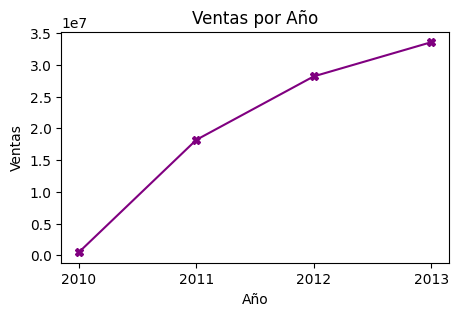

In [ ]:
plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', marker='X')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

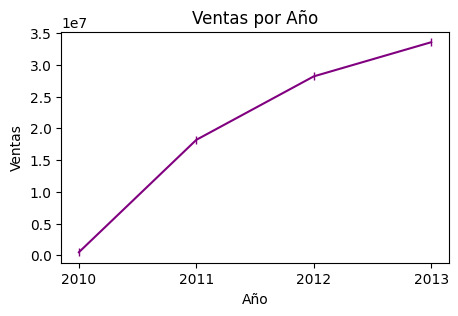

In [ ]:
plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', marker='|')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

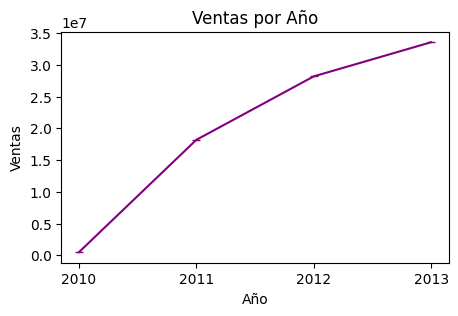

In [ ]:
plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', marker='_')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

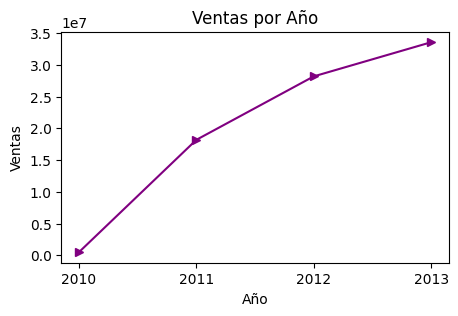

In [ ]:
plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', marker='>')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

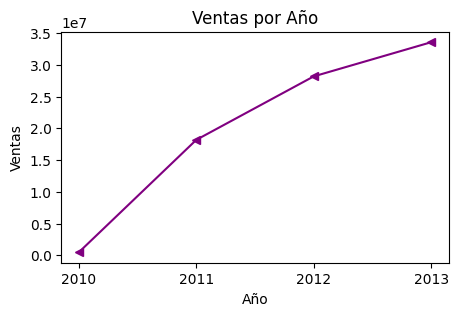

In [ ]:
plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', marker='<')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

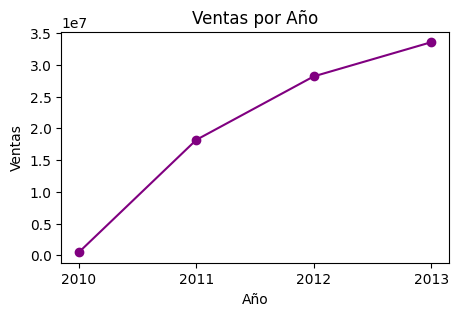

In [ ]:
plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', marker='o')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#306998'>

### **<font color="#FFFFFF">Tamaño del marcador: markersize</font>**

</td>
</tr>
</table>

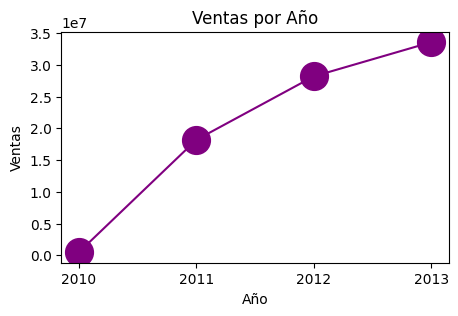

In [ ]:
plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', marker='o', markersize=20)
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#306998'>

### **<font color="#FFFFFF">Color de la línea de contorno del marcador</font>**

</td>
</tr>
</table>

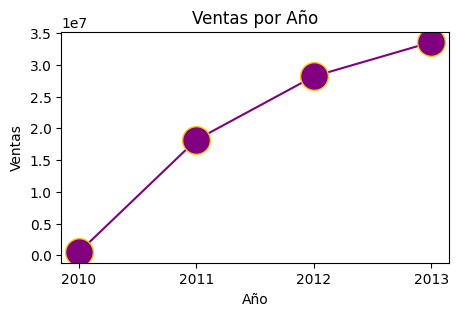

In [ ]:
plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', marker='o', markersize=20, markeredgecolor=(255/255, 201/255, 1/255))
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#306998'>

### **<font color="#FFFFFF">Color fondo del marcador</font>**

</td>
</tr>
</table>

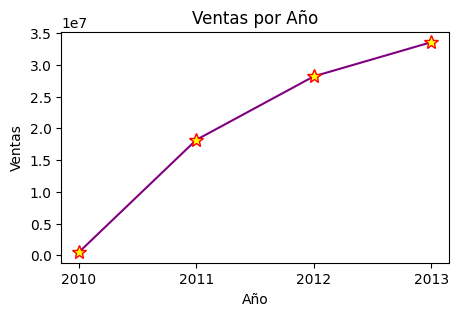

In [ ]:
plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', marker='*', markersize=10, markeredgecolor='red', markerfacecolor='yellow')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#306998'>

### **<font color="#FFFFFF">Cambiar el ancho a la línea de contorno del marcador</font>**

</td>
</tr>
</table>

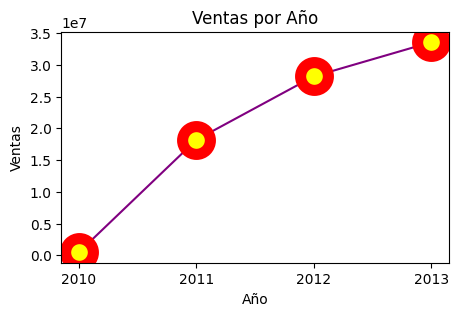

In [ ]:
plt.style.use('default')
plt.figure(figsize=(5, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'],
         color='purple',
         marker='o',
         markersize=20,
         markeredgecolor='red',
         markerfacecolor='yellow',
         markeredgewidth=8)
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> Función figure</font>**
</td>
</tr>
</table>

La función **figure()** se utiliza para crear una figura, que es el contenedor principal para tus gráficos y visualizaciones.

<table width='99%'>
<tr>
<td bgcolor='#306998'>

### **<font color="#FFFFFF">Características</font>**

</td>
</tr>
</table>

>* **Contenedor de Gráficos**: La figura actúa como un contenedor para uno o más ejes (o subgráficos). Dentro de la figura, puedes dibujar múltiples gráficos, incluir leyendas, títulos, etiquetas, y más.
>* **Tamaño y Aspecto**: Al crear una figura, puedes especificar su tamaño físico (generalmente en pulgadas) y otros aspectos visuales, como el color de fondo y el borde. Esto te permite diseñar la figura según tus necesidades.
>* **Gestión de Ejes**: Puedes agregar uno o más ejes a la figura, lo que te permite crear gráficos complejos con múltiples subgráficos. Cada eje se puede personalizar por separado.
>* **Interactividad**: Las figuras son interactivas; puedes acercar, alejar, guardar y exportar visualizaciones directamente desde la figura.
>* **Configuración Global**: Algunas configuraciones se aplican a todas las visualizaciones dentro de una figura. Por ejemplo, el formato de los ejes, el estilo de las líneas, o la inclusión de rótulos.

<table width='99%'>
<tr>
<td bgcolor='#306998'>

### **<font color="#FFFFFF">figsize</font>**

</td>
</tr>
</table>

Especifica el tamaño de la figura en pulgadas, como una tupla (ancho, altura)

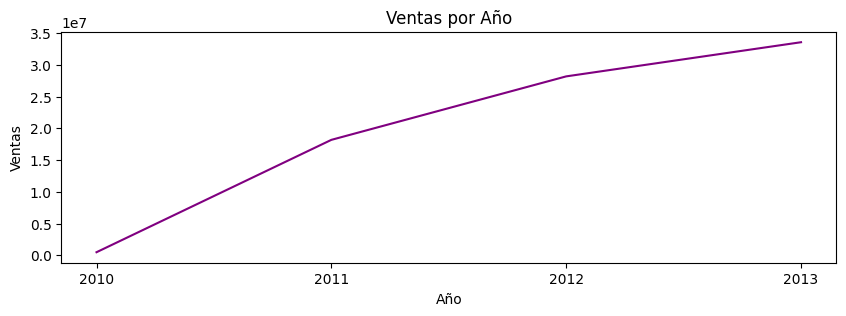

In [ ]:
plt.style.use('default')
plt.figure(figsize=(10, 3))
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#306998'>

### **<font color="#FFFFFF">dpi</font>**

</td>
</tr>
</table>

Establece la resolución de la figura en puntos por pulgada (dots per inch)

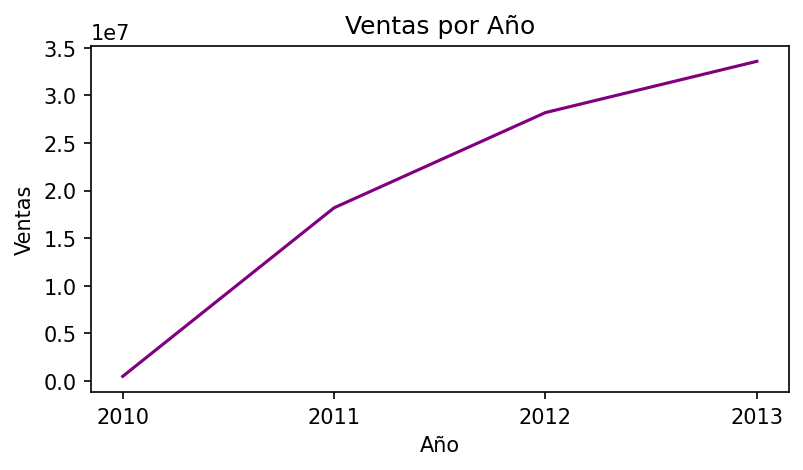

In [ ]:
plt.style.use('default')
plt.figure(figsize=(6, 3), dpi=150)
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#306998'>

### **<font color="#FFFFFF">Fondo de la figura</font>**

</td>
</tr>
</table>

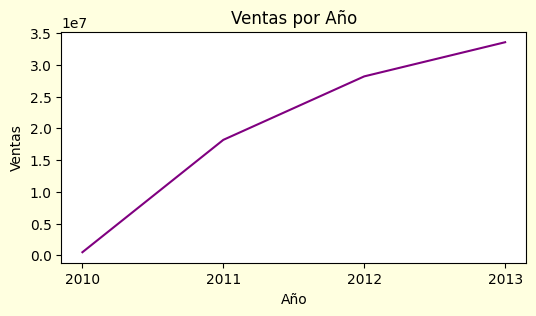

In [ ]:
plt.style.use('default')
plt.figure(figsize=(6, 3), facecolor='lightyellow')
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#306998'>

### **<font color="#FFFFFF">Marco alrededor de la figura</font>**

</td>
</tr>
</table>

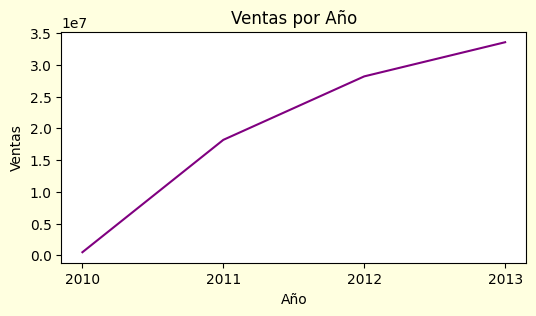

In [ ]:
plt.style.use('default')
plt.figure(figsize=(6, 3), facecolor='lightyellow', frameon=True)
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_año['Año'])
plt.title('Ventas por Año')
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#306998'>

### **<font color="#FFFFFF">Manejo de subplots</font>**

</td>
</tr>
</table>

In [ ]:
df_ventas_x_año = df_FactVentas.groupby('Año')['Ventas'].sum().reset_index()
df_ventas_x_año.head(50)

,Año,Ventas
0,2010,4.893286e+05
1,2011,1.819280e+07
2,2012,2.819363e+07
3,2013,3.357483e+07


In [ ]:
df_costos_x_año = df_FactVentas.groupby('Año')['Costos'].sum().reset_index()
df_costos_x_año.head(50)

,Año,Costos
0,2010,4.722951e+05
1,2011,1.816338e+07
2,2012,2.727773e+07
3,2013,3.406670e+07


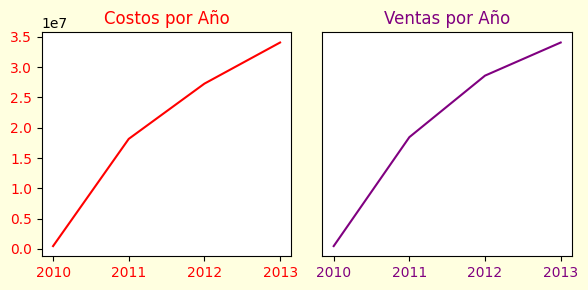

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.figure(figsize=(6, 3), facecolor='lightyellow', frameon=True)

plt.subplot(1, 2, 1) # 1: 1 Fila, 2: 2 columnas, 1: Colocare el primer gráfico
plt.plot(df_costos_x_año['Año'], df_costos_x_año['Costos'], color='red')
# plt.xlabel('Año')
# plt.ylabel('Costos')
plt.title('Costos por Año', color='red')
plt.xticks(df_ventas_x_año['Año'], color='red')
plt.yticks(color='red')

plt.subplot(1, 2, 2) # 1: 1 Fila, 2: 2 columnas, 2: Colocare el segundo gráfico
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple')
# plt.xlabel('Año')
# plt.ylabel('Ventas')
plt.title('Ventas por Año', color='purple')
plt.xticks(df_ventas_x_año['Año'], color='purple')

plt.yticks([])

plt.tight_layout()
plt.show()

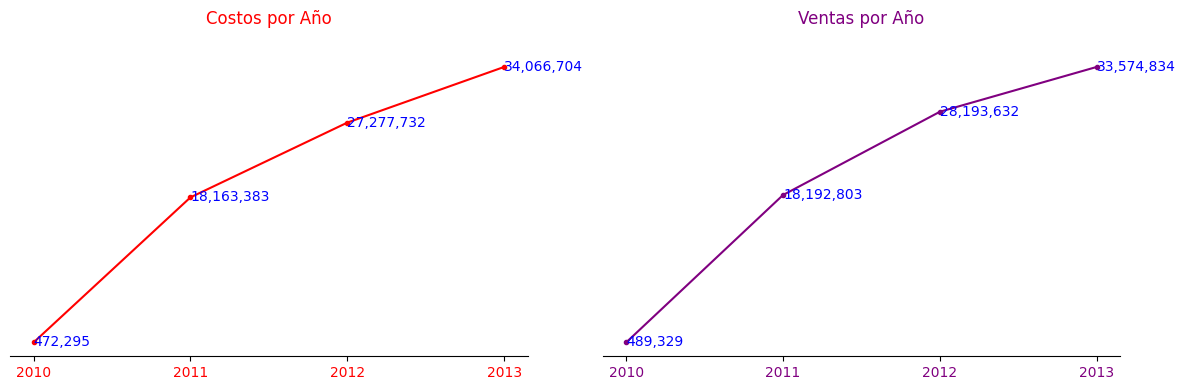

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1) # 1: 1 Fila, 2: 2 columnas, 1: Colocare el primer gráfico
plt.plot(df_costos_x_año['Año'], df_costos_x_año['Costos'], color='red', marker='.')
plt.title('Costos por Año\n', color='red')
plt.xticks(df_costos_x_año['Año'], color='red')
plt.yticks([])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)

for i in range(len(df_costos_x_año)):
  strValor = f"{df_costos_x_año['Costos'][i]:,.0f}"
  plt.text(df_costos_x_año['Año'][i], df_costos_x_año['Costos'][i], strValor, ha='left', va='center', color='blue')


plt.subplot(1, 2, 2) # 1: 1 Fila, 2: 2 columnas, 2: Colocare el segundo gráfico
plt.plot(df_ventas_x_año['Año'], df_ventas_x_año['Ventas'], color='purple', marker='.')
plt.title('Ventas por Año\n', color='purple')
plt.xticks(df_ventas_x_año['Año'], color='purple')
plt.yticks([])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)

for i in range(len(df_ventas_x_año)):
  strValor = f"{df_ventas_x_año['Ventas'][i]:,.0f}"
  plt.text(df_ventas_x_año['Año'][i], df_ventas_x_año['Ventas'][i], strValor, ha='left', va='center', color='blue')


plt.tight_layout() # Para ajustar el espaciado entre subgráficos
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> Ventas totales a lo largo del tiempo</font>**
</td>
</tr>
</table>

In [ ]:
df_FactVentas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60855 entries, 0 to 60854
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ProductKey                     60855 non-null  int64         
 1   EmployeeKey                    60855 non-null  int64         
 2   PromotionKey                   60855 non-null  int64         
 3   CurrencyKey                    60855 non-null  int64         
 4   SalesTerritoryKey              60855 non-null  int64         
 5   ResellerKey                    60855 non-null  int64         
 6   SalesOrderNumber               60855 non-null  object        
 7   SalesOrderLineNumber           60855 non-null  int64         
 8   OrderQuantity                  60855 non-null  int64         
 9   UnitPrice                      60855 non-null  float64       
 10  UnitPriceDiscountPct           60855 non-null  float64       
 11  ProductStandard

In [ ]:
df_ventas_x_fecha = df_FactVentas.groupby('Fecha')['Ventas'].sum().reset_index()
df_ventas_x_fecha

NameError: name 'df_FactVentas' is not defined

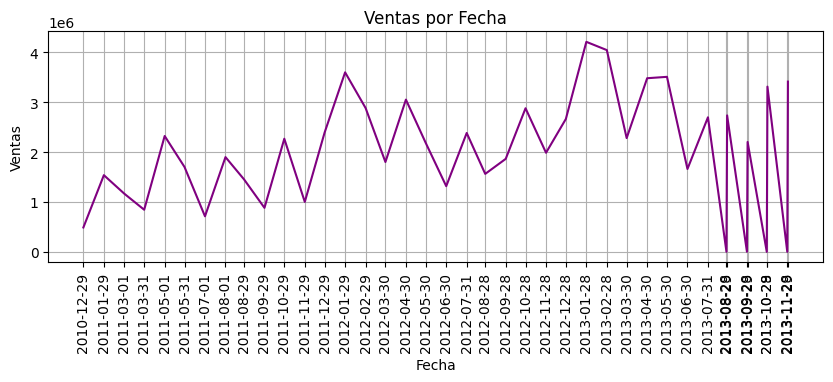

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.figure(figsize=(10, 3))
plt.plot(df_ventas_x_fecha['Fecha'], df_ventas_x_fecha['Ventas'], color='purple')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_fecha['Fecha'], rotation=90)
plt.title('Ventas por Fecha')
plt.grid(True)
plt.show()